<a href="https://colab.research.google.com/github/gigisy/ProjectML/blob/main/ML_Cluster/Unsupervised_ML_Clustering_Gizi_Balita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING

In [ ]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import missingno
import seaborn as sns
#plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, partial_correlations
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering as AC
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=a56f955f7532cbe7905b37468acb9056d7c1db05723ebcda3683fda5867f8f44
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


## READ THE DATA

In [ ]:
# data = pd.read_csv('/content/ads.csv')
# data

In [ ]:
data = pd.read_csv('/content/data.csv')
data

,Provinsi,tb_pendek(%),asi_eks(%),konsum_5mm(%),dilayani_SDID,pengeluaran,pengeluaran_mandiri
0,ACEH,6.7,65.88,54.05,53.3,27561,10.780
1,SUMATERA UTARA,3.4,57.17,54.07,34.8,24689,16.582
2,SUMATERA BARAT,7.8,74.32,57.89,67.4,30448,12.671
3,RIAU,2.6,69.51,55.31,32.7,23504,17.788
4,JAMBI,2.6,72.68,51.37,48.4,26163,16.988
5,SUMATERA SELATAN,1.4,70.46,63.52,85.6,23074,13.958
6,BENGKULU,4.1,67.84,60.72,43.0,21310,14.155
7,LAMPUNG,3.1,76.76,55.65,81.9,25499,13.792
8,KEP. BANGKA BELITUNG,2.7,62.77,55.26,79.3,21674,15.470
9,KEP. RIAU,3.1,62.40,61.41,80.9,29202,14.841


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provinsi             34 non-null     object 
 1   tb_pendek(%)         34 non-null     float64
 2   asi_eks(%)           34 non-null     float64
 3   konsum_5mm(%)        34 non-null     float64
 4   dilayani_SDID        34 non-null     float64
 5   pengeluaran          34 non-null     int64  
 6   pengeluaran_mandiri  34 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.0+ KB


## CHECKING MISSING VALUE

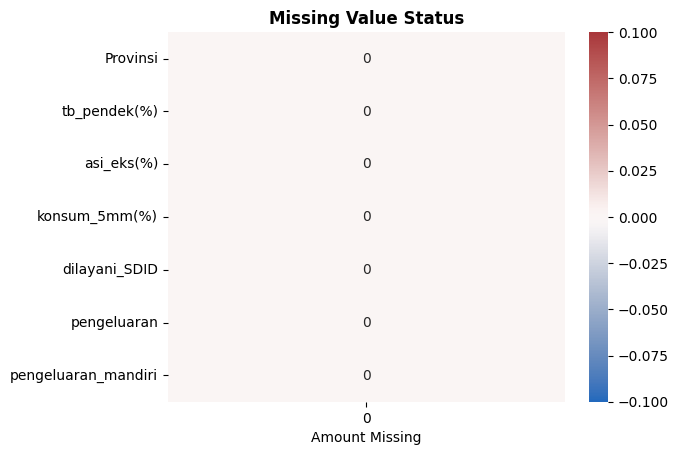

In [ ]:
# cek missing value
plt.title('Missing Value Status',fontweight='bold')
ax =sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

## CHECKING DUPLICATE VALUE

In [ ]:
# Memeriksa Data Duplikat
print('Jumlah Duplikasi :', data.duplicated().sum())
data.describe()

Jumlah Duplikasi : 0


,tb_pendek(%),asi_eks(%),konsum_5mm(%),dilayani_SDID,pengeluaran,pengeluaran_mandiri
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,6.820588,69.208824,52.015882,61.097059,23791.205882,13.148000
std,4.094696,7.258185,10.350378,20.573836,11673.931380,5.405999
min,1.000000,53.600000,33.630000,19.200000,7752.000000,4.516000
25%,3.100000,63.510000,42.432500,45.250000,14887.000000,7.964250
50%,6.600000,69.615000,54.060000,63.800000,23289.000000,13.973000
75%,9.350000,75.577500,60.665000,76.525000,29172.750000,16.304000
max,18.200000,79.690000,72.540000,89.100000,65630.000000,29.338000


## CHECKING OUTLIER

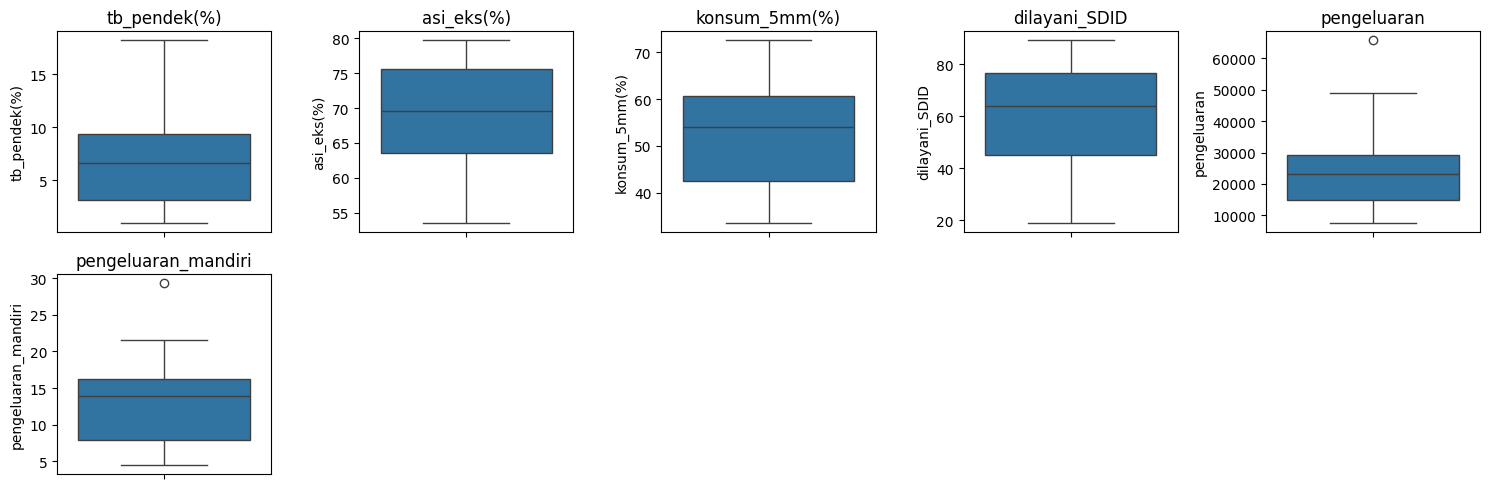

In [ ]:
# Membuat boxplot untuk kolom 2 sampai 9 (Var1 hingga Var8)
plt.figure(figsize=(15, 5))
for i, col in enumerate(data.columns[1:11], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.grid(False)
plt.tight_layout()
plt.show()

# MODELLING

## SCALLING THE DATA

In [ ]:
# Pilih kolom yang relevan untuk analisis (kecuali kolom 'Provinsi')
df = data.copy().iloc[:, 1:]
df.head()

,tb_pendek(%),asi_eks(%),konsum_5mm(%),dilayani_SDID,pengeluaran,pengeluaran_mandiri
0,6.7,65.88,54.05,53.3,27561,10.780
1,3.4,57.17,54.07,34.8,24689,16.582
2,7.8,74.32,57.89,67.4,30448,12.671
3,2.6,69.51,55.31,32.7,23504,17.788
4,2.6,72.68,51.37,48.4,26163,16.988


In [ ]:
# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## CALCULATING VIF

In [ ]:
# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# Kalkulasi VIF
vif_data["VIF"] = [variance_inflation_factor(data_scaled, i) for i in range(data_scaled.shape[1])]

print(vif_data)

               feature       VIF
0         tb_pendek(%)  1.831554
1           asi_eks(%)  1.997241
2        konsum_5mm(%)  5.356842
3        dilayani_SDID  1.272497
4          pengeluaran  5.412950
5  pengeluaran_mandiri  7.513426


## KMO TEST

In [ ]:
# Lakukan uji KMO
kmo_all, kmo_model = calculate_kmo(data_scaled)
print(f"KMO Model: {kmo_model}")

#print("KMO Individual:")
#for var, kmo in zip(df.columns, kmo_all):
#    print(f"{var}: {kmo}")

KMO Model: 0.6464081540274137


## BARTLETT TEST

In [ ]:
# Lakukan uji Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
print(f"Bartlett's test: Chi-Square value = {chi_square_value}, p-value = {p_value}")

Bartlett's test: Chi-Square value = 118.70219221846197, p-value = 3.378360189711609e-18


# K-MEANS CLUSTERING

## CHOOSING OPTIMAL NUMBER OF CLUSTERS USING WITHIN SUM SQUARE

In [ ]:
# BEFORE PCA
inertia = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)
inertia

[204.0,
 128.7593287027532,
 108.9545063137422,
 87.25651963711239,
 73.9814067580988,
 63.01083120288125,
 54.494058304793775,
 47.942637671286136,
 40.89557989265255,
 37.23471296752357]

In [ ]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 11)])
inertia_df

,Inertia
1,204.000000
2,128.759329
3,108.954506
4,87.256520
5,73.981407
6,63.010831
7,54.494058
8,47.942638
9,40.895580
10,37.234713


Text(0.5, 1.0, 'Elbow Method')

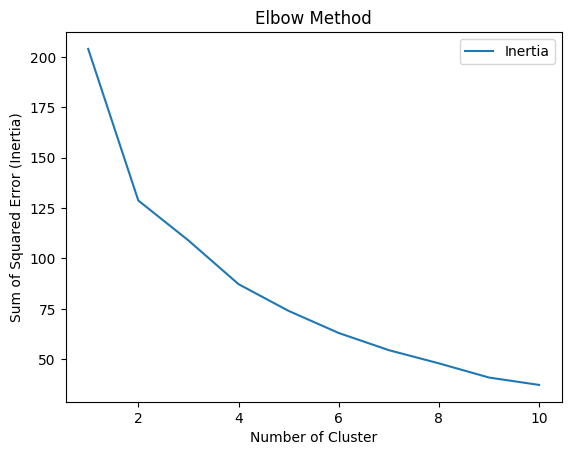

In [ ]:
inertia_df.plot(kind='line')
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')

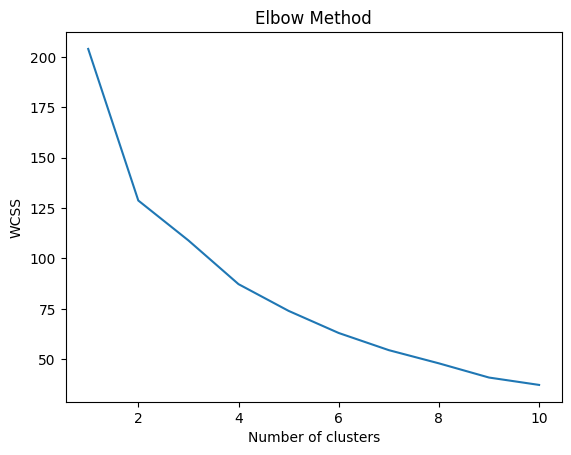

In [ ]:
# Tentukan jumlah cluster yang optimal (menggunakan metode elbow)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot hasil metode elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(False)
plt.show()

## CLUSTERING USING 2 CLUSTERS

In [ ]:
# Tentukan jumlah cluster
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan hasil clustering ke data asli
#data['Cluster'] = clusters

# Tampilkan data dengan hasil clustering
#print(data.head())

In [ ]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## METRICS EVALUATION

In [ ]:
# Menghitung silhouette score untuk setiap sampel
silhouette_km = silhouette_score(data_scaled, clusters)
#print(f"Average silhouette score: {silhouette_km}")

# Calinski-harabasz
calinski_km = calinski_harabasz_score(data_scaled, clusters)

# Davies bouldin
dbi_km = davies_bouldin_score(data_scaled, clusters)

# Metrics Evaluation
model_selection=pd.DataFrame({'K Means':[silhouette_km]},
                              index=['Silhouette Score'])
model_selection

,K Means
Silhouette Score,0.332007
